In [1]:
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D,MaxPooling2D,Flatten, Dropout, BatchNormalization,Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.datasets import cifar10

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

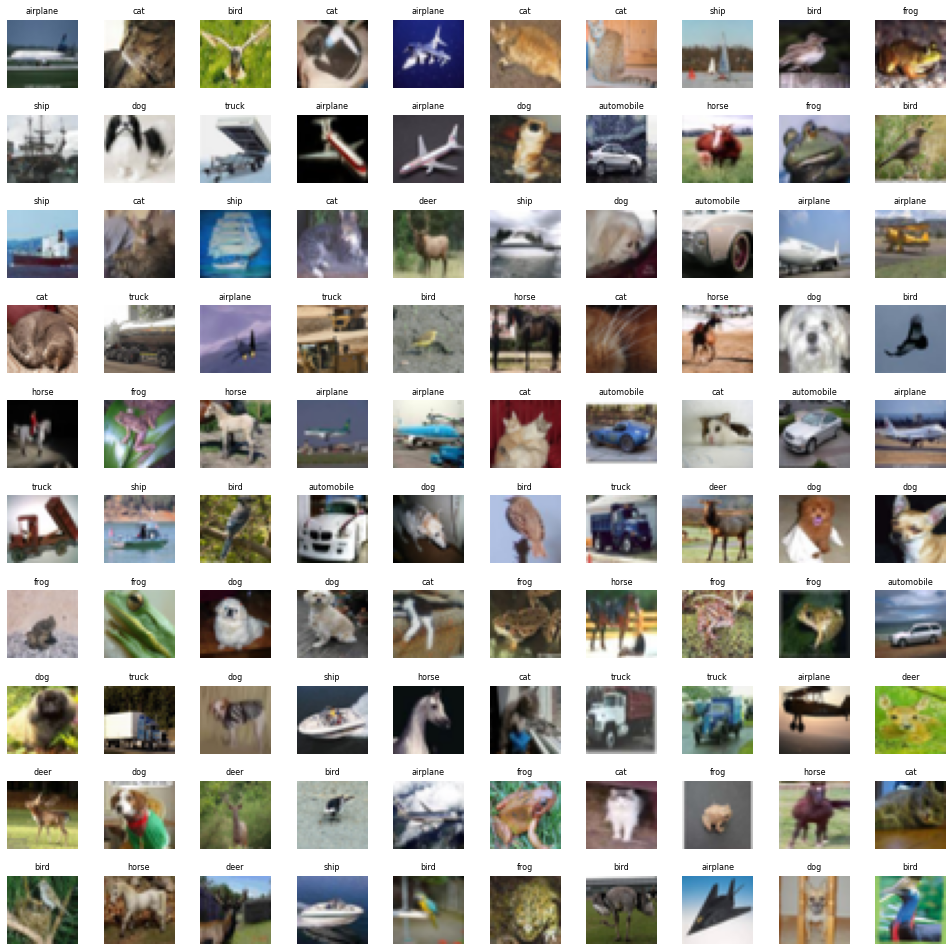

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 
n_train = len(x_train) 

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train) 
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

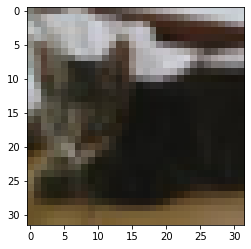

In [6]:
import matplotlib.pyplot as plt
plt.imshow(np.squeeze(x_train[9]))

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()
model.add(Conv2D(filters= 32 , kernel_size=(3,3), padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=100,validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 39s 18ms/step - loss: 1.9058 - accuracy: 0.2798 - val_loss: 1.2421 - val_accuracy: 0.5515
Epoch 2/10
500/500 [==============================] - 8s 16ms/step - loss: 1.2483 - accuracy: 0.5490 - val_loss: 1.0699 - val_accuracy: 0.6239
Epoch 3/10
500/500 [==============================] - 8s 16ms/step - loss: 1.0424 - accuracy: 0.6254 - val_loss: 0.9117 - val_accuracy: 0.6782
Epoch 4/10
500/500 [==============================] - 8s 16ms/step - loss: 0.9075 - accuracy: 0.6828 - val_loss: 0.7882 - val_accuracy: 0.7223
Epoch 5/10
500/500 [==============================] - 8s 16ms/step - loss: 0.8047 - accuracy: 0.7171 - val_loss: 0.7401 - val_accuracy: 0.7419
Epoch 6/10
500/500 [==============================] - 8s 16ms/step - loss: 0.7427 - accuracy: 0.7389 - val_loss: 0.7122 - val_accuracy: 0.7532
Epoch 7/10
500/500 [==============================] - 8s 17ms/step - loss: 0.6839 - accuracy: 0.7638 - val_loss: 0.6790 - val_accuracy: 0.766

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0

In [12]:
scor = model.evaluate((x_test),(y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

313/313 - 2s - loss: 0.6931 - accuracy: 0.7599
test los 0.6931
test acc 0.7599


In [13]:
scor = model.evaluate((x_train),(y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

1563/1563 - 7s - loss: 0.4368 - accuracy: 0.8480
train los 0.4368
train acc 0.8480


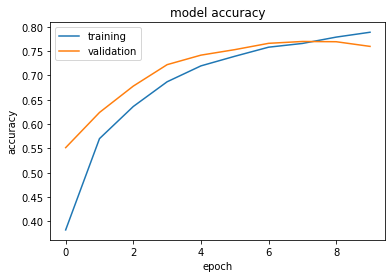

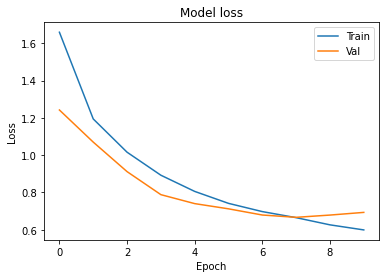

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

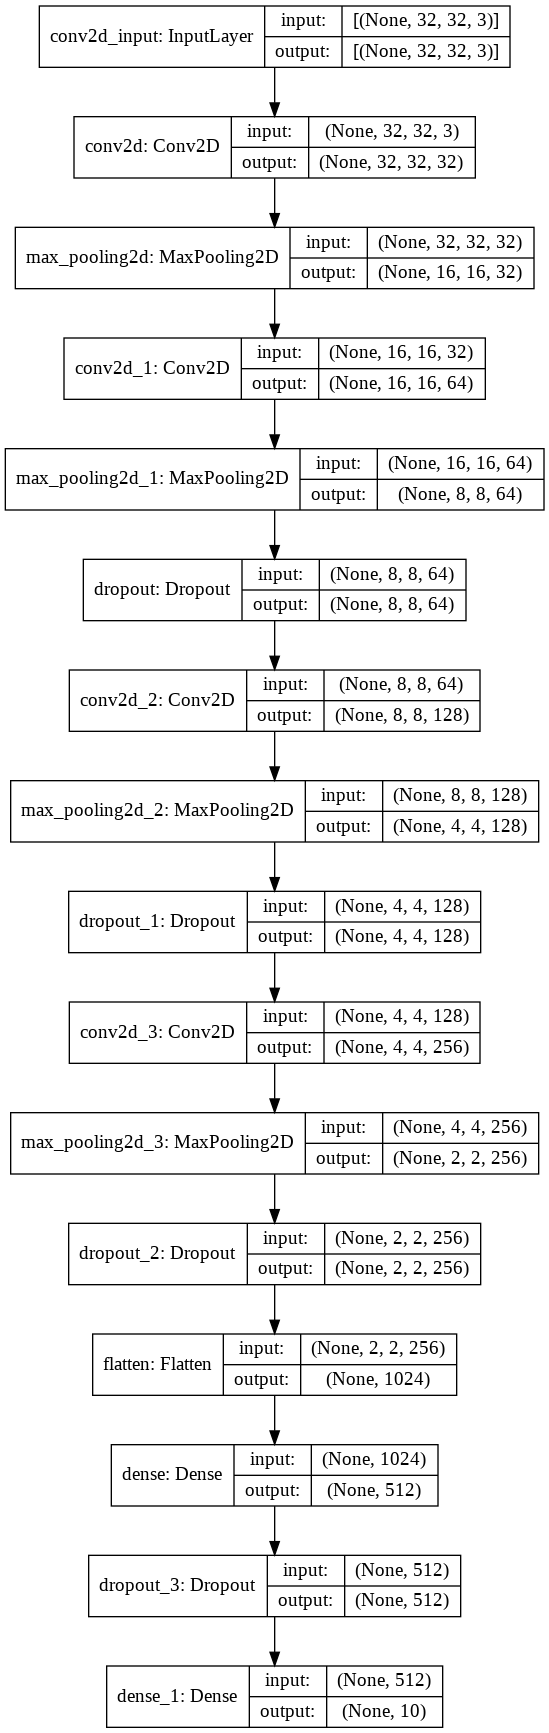

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/10
500/500 [==============================] - 9s 17ms/step - loss: 2.2964 - accuracy: 0.1104 - val_loss: 2.2291 - val_accuracy: 0.2163
Epoch 2/10
500/500 [==============================] - 8s 16ms/step - loss: 2.1515 - accuracy: 0.2090 - val_loss: 1.9821 - val_accuracy: 0.2838
Epoch 3/10
500/500 [==============================] - 8s 16ms/step - loss: 2.0022 - accuracy: 0.2587 - val_loss: 1.8914 - val_accuracy: 0.3396
Epoch 4/10
500/500 [==============================] - 8s 16ms/step - loss: 1.9087 - accuracy: 0.3051 - val_loss: 1.7917 - val_accuracy: 0.3692
Epoch 5/10
500/500 [==============================] - 8s 16ms/step - loss: 1.8070 - accuracy: 0.3387 - val_loss: 1.6792 - val_accuracy: 0.3914
Epoch 6/10
500/500 [==============================] - 8s 16ms/step - loss: 1.7316 - accuracy: 0.3604 - val_loss: 1.6136 - val_accuracy: 0.4081
Epoch 7/10
500/500 [==============================] - 8s 16ms/step - loss: 1.6621 - accuracy: 0.3898 - val_loss: 1.5570 - val_accuracy: 0.4239

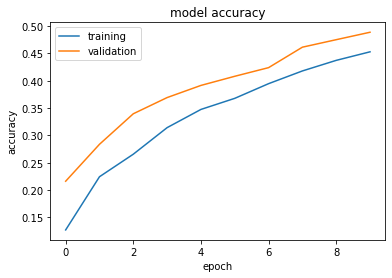

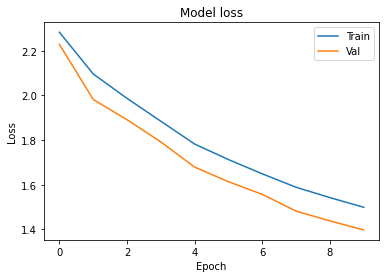

In [16]:
model2 = Sequential()
model2.add(Conv2D(filters= 32 , kernel_size=(3,3), padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512, activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation = 'softmax'))

model2.compile(optimizer ='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

hist2 = model2.fit(x_train, y_train, epochs=10, batch_size=100,validation_data=(x_test, y_test))

scor = model2.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = model2.evaluate((x_train),(y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

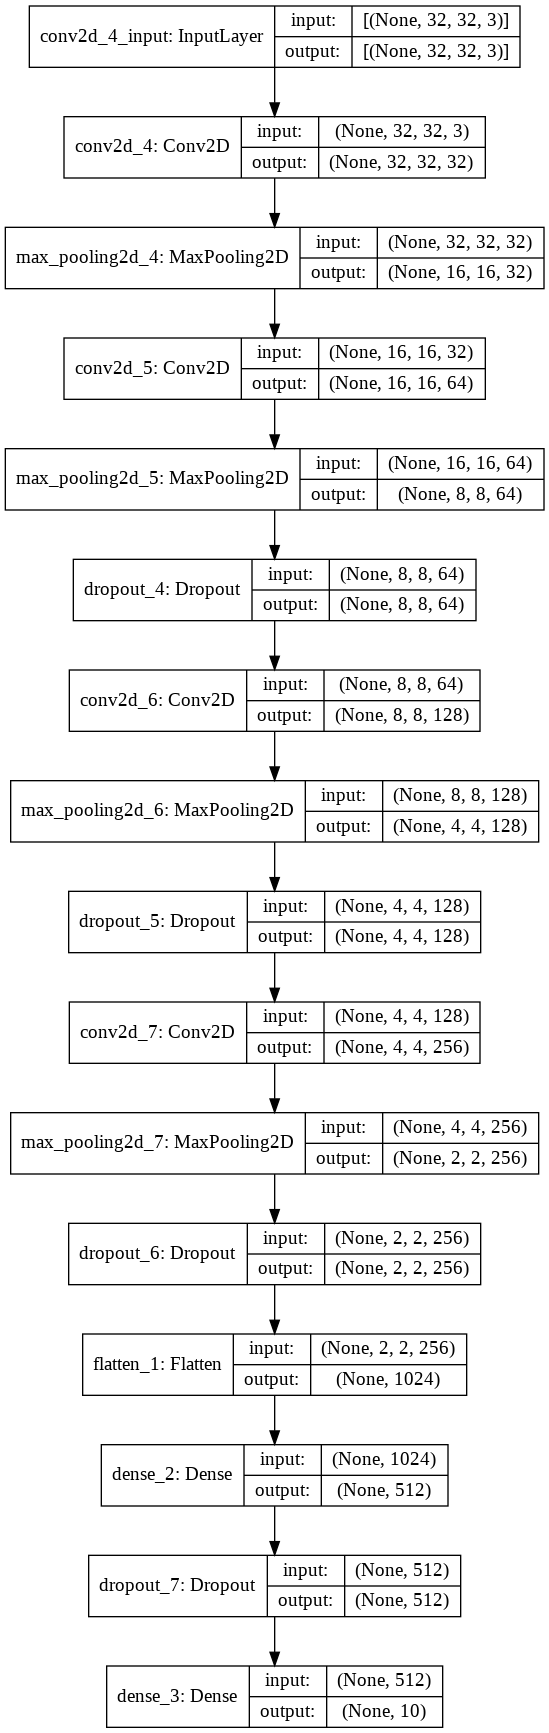

In [17]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)        

Epoch 1/10
500/500 [==============================] - 10s 19ms/step - loss: 1.6993 - accuracy: 0.4181 - val_loss: 2.1980 - val_accuracy: 0.2933
Epoch 2/10
500/500 [==============================] - 9s 17ms/step - loss: 1.0647 - accuracy: 0.6253 - val_loss: 1.7568 - val_accuracy: 0.4611
Epoch 3/10
500/500 [==============================] - 9s 17ms/step - loss: 0.8683 - accuracy: 0.6982 - val_loss: 1.9283 - val_accuracy: 0.4698
Epoch 4/10
500/500 [==============================] - 9s 17ms/step - loss: 0.7308 - accuracy: 0.7482 - val_loss: 1.1071 - val_accuracy: 0.6269
Epoch 5/10
500/500 [==============================] - 9s 17ms/step - loss: 0.6231 - accuracy: 0.7892 - val_loss: 0.9773 - val_accuracy: 0.6682
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 0.5322 - accuracy: 0.8229 - val_loss: 1.0083 - val_accuracy: 0.6669
Epoch 7/10
500/500 [==============================] - 9s 17ms/step - loss: 0.4516 - accuracy: 0.8534 - val_loss: 1.1916 - val_accuracy: 0.619

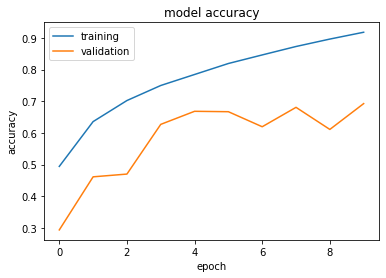

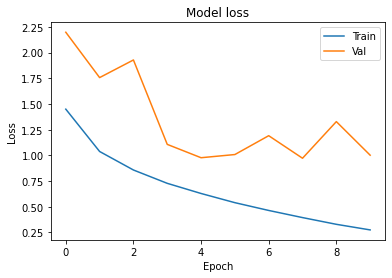

In [19]:
model3 = Sequential()
model3.add(Conv2D(filters= 32 , kernel_size=(3,3), padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(512, activation = 'relu'))
model3.add(BatchNormalization())

model3.add(Dense(10, activation = 'softmax'))

model3.compile(optimizer ='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

hist3 = model3.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))

scor = model3.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = model3.evaluate((x_train),(y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)        

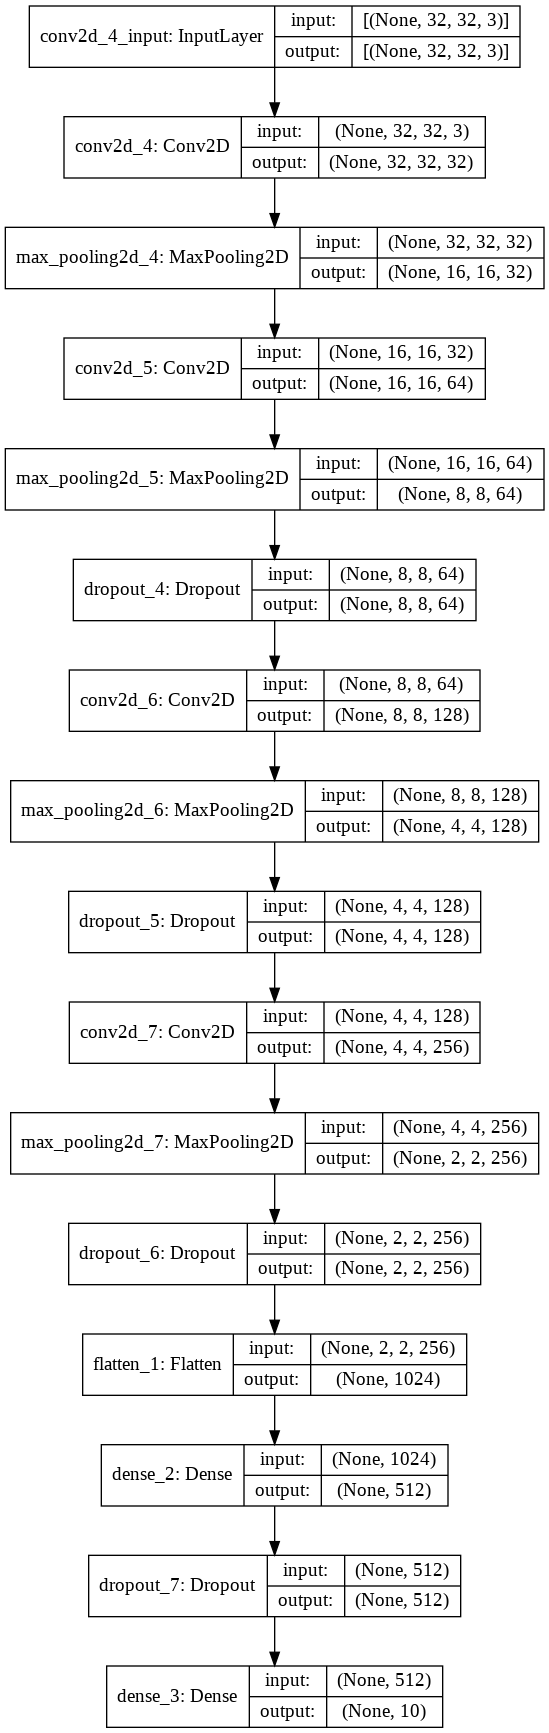

In [21]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
from keras.regularizers import l2

Epoch 1/10
500/500 [==============================] - 10s 19ms/step - loss: 4.6446 - accuracy: 0.4034 - val_loss: 4.7863 - val_accuracy: 0.2950
Epoch 2/10
500/500 [==============================] - 9s 18ms/step - loss: 3.5250 - accuracy: 0.6119 - val_loss: 3.5882 - val_accuracy: 0.4897
Epoch 3/10
500/500 [==============================] - 9s 18ms/step - loss: 2.9064 - accuracy: 0.6880 - val_loss: 3.5650 - val_accuracy: 0.4701
Epoch 4/10
500/500 [==============================] - 9s 18ms/step - loss: 2.4414 - accuracy: 0.7326 - val_loss: 2.4595 - val_accuracy: 0.6500
Epoch 5/10
500/500 [==============================] - 9s 18ms/step - loss: 2.0608 - accuracy: 0.7719 - val_loss: 2.3256 - val_accuracy: 0.6309
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 1.7427 - accuracy: 0.8082 - val_loss: 2.6846 - val_accuracy: 0.5231
Epoch 7/10
500/500 [==============================] - 9s 18ms/step - loss: 1.4896 - accuracy: 0.8343 - val_loss: 2.1648 - val_accuracy: 0.595

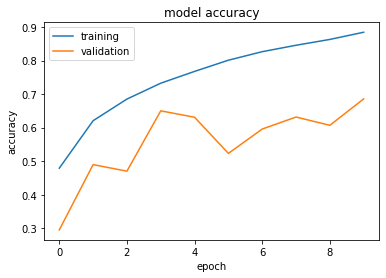

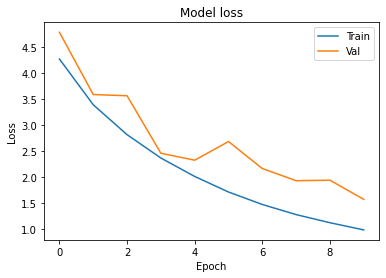

In [23]:
model4 = Sequential()
model4.add(Conv2D(filters= 32 , kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(filters=64, kernel_size=(3,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), padding = 'same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Conv2D(filters=128, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Conv2D(filters=256, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Flatten())

model4.add(Dense(512, activation = 'relu'))
model4.add(BatchNormalization())

model4.add(Dense(10, activation = 'softmax'))

model4.compile(optimizer ='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

hist4 = model4.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))

scor = model4.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = model4.evaluate((x_train),(y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show() 

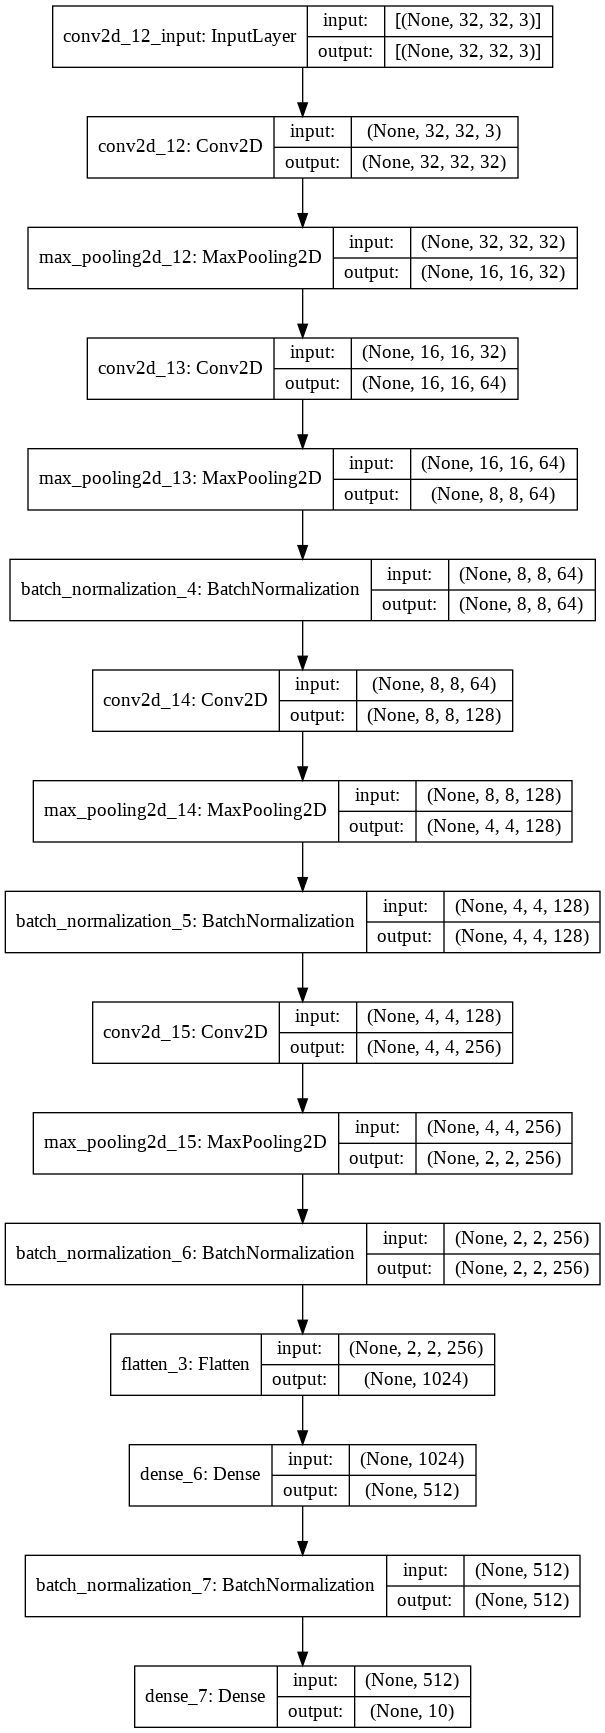

In [24]:
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 128)        

Epoch 1/10
500/500 [==============================] - 11s 21ms/step - loss: 5.2488 - accuracy: 0.2701 - val_loss: 4.9718 - val_accuracy: 0.2190
Epoch 2/10
500/500 [==============================] - 10s 19ms/step - loss: 4.0643 - accuracy: 0.4271 - val_loss: 4.4987 - val_accuracy: 0.3370
Epoch 3/10
500/500 [==============================] - 10s 19ms/step - loss: 3.4587 - accuracy: 0.4805 - val_loss: 3.2110 - val_accuracy: 0.4856
Epoch 4/10
500/500 [==============================] - 10s 19ms/step - loss: 2.9888 - accuracy: 0.5249 - val_loss: 3.1138 - val_accuracy: 0.4322
Epoch 5/10
500/500 [==============================] - 10s 19ms/step - loss: 2.6206 - accuracy: 0.5610 - val_loss: 2.3805 - val_accuracy: 0.5832
Epoch 6/10
500/500 [==============================] - 10s 19ms/step - loss: 2.3217 - accuracy: 0.5847 - val_loss: 2.4014 - val_accuracy: 0.5269
Epoch 7/10
500/500 [==============================] - 10s 19ms/step - loss: 2.0656 - accuracy: 0.6093 - val_loss: 2.0186 - val_accuracy:

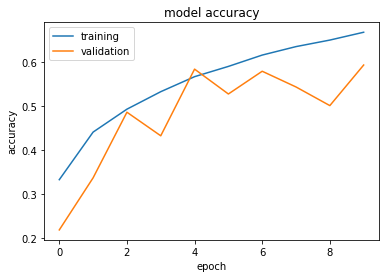

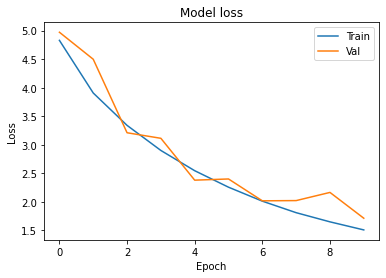

In [26]:
model5 = Sequential()
model5.add(Conv2D(filters= 32 , kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Conv2D(filters=64, kernel_size=(3,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), padding = 'same', activation = 'relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Conv2D(filters=128, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Conv2D(filters=256, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))


model5.add(Flatten())

model5.add(Dense(512, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Dense(10, activation = 'softmax'))

model5.compile(optimizer ='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

hist5 = model5.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))

scor = model5.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = model5.evaluate((x_train),(y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show() 

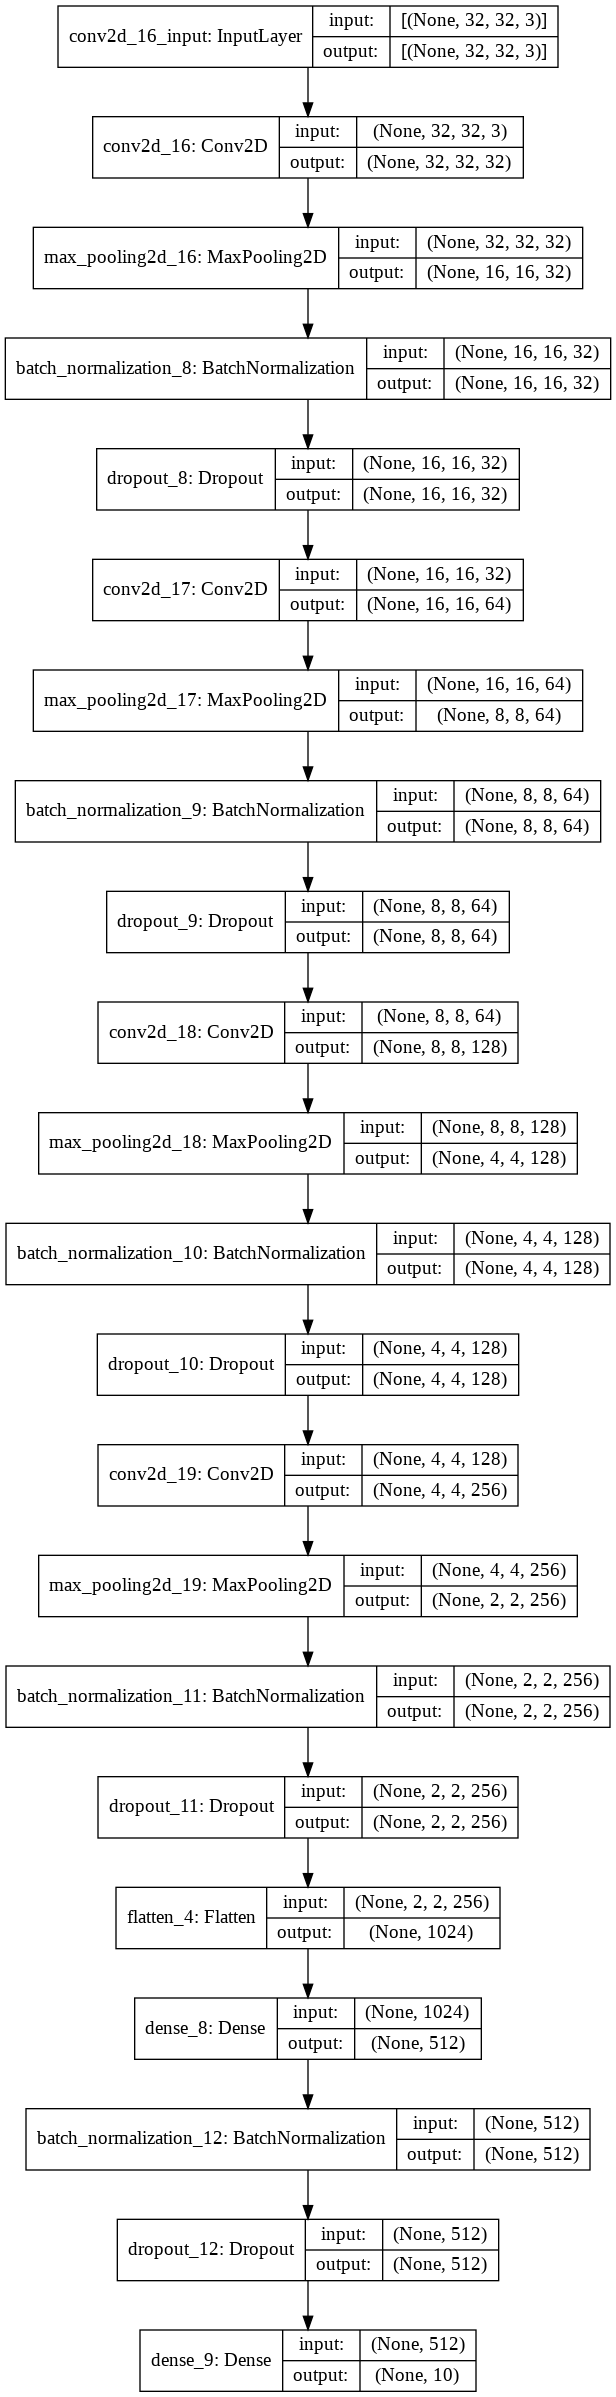

In [27]:
plot_model(model5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 64)         

Epoch 1/10
500/500 [==============================] - 12s 21ms/step - loss: 4.4553 - accuracy: 0.3531 - val_loss: 5.0529 - val_accuracy: 0.1226
Epoch 2/10
500/500 [==============================] - 10s 20ms/step - loss: 1.9972 - accuracy: 0.5656 - val_loss: 2.2348 - val_accuracy: 0.4423
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 1.5975 - accuracy: 0.6319 - val_loss: 1.4890 - val_accuracy: 0.6629
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 1.4963 - accuracy: 0.6584 - val_loss: 1.8977 - val_accuracy: 0.5548
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 1.4678 - accuracy: 0.6776 - val_loss: 1.7797 - val_accuracy: 0.5634
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 1.4583 - accuracy: 0.6814 - val_loss: 1.5217 - val_accuracy: 0.6493
Epoch 7/10
500/500 [==============================] - 10s 20ms/step - loss: 1.4528 - accuracy: 0.6838 - val_loss: 1.7460 - val_accuracy:

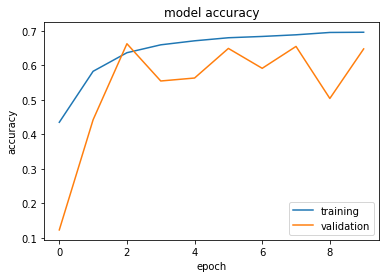

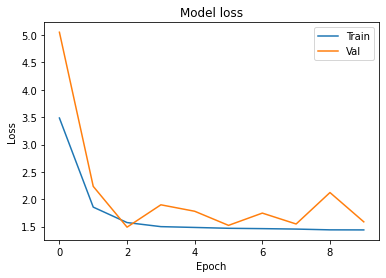

In [29]:
model6 = Sequential()
model6.add(Conv2D(filters= 32 , kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Conv2D(filters=64, kernel_size=(3,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), padding = 'same', activation = 'relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Conv2D(filters=128, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Conv2D(filters=256, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding = 'same', activation = 'relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))


model6.add(Flatten())

model6.add(Dense(512, activation = 'relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(10, activation = 'softmax'))

model6.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

hist6 = model6.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))

scor = model5.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = model5.evaluate((x_train),(y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show() 

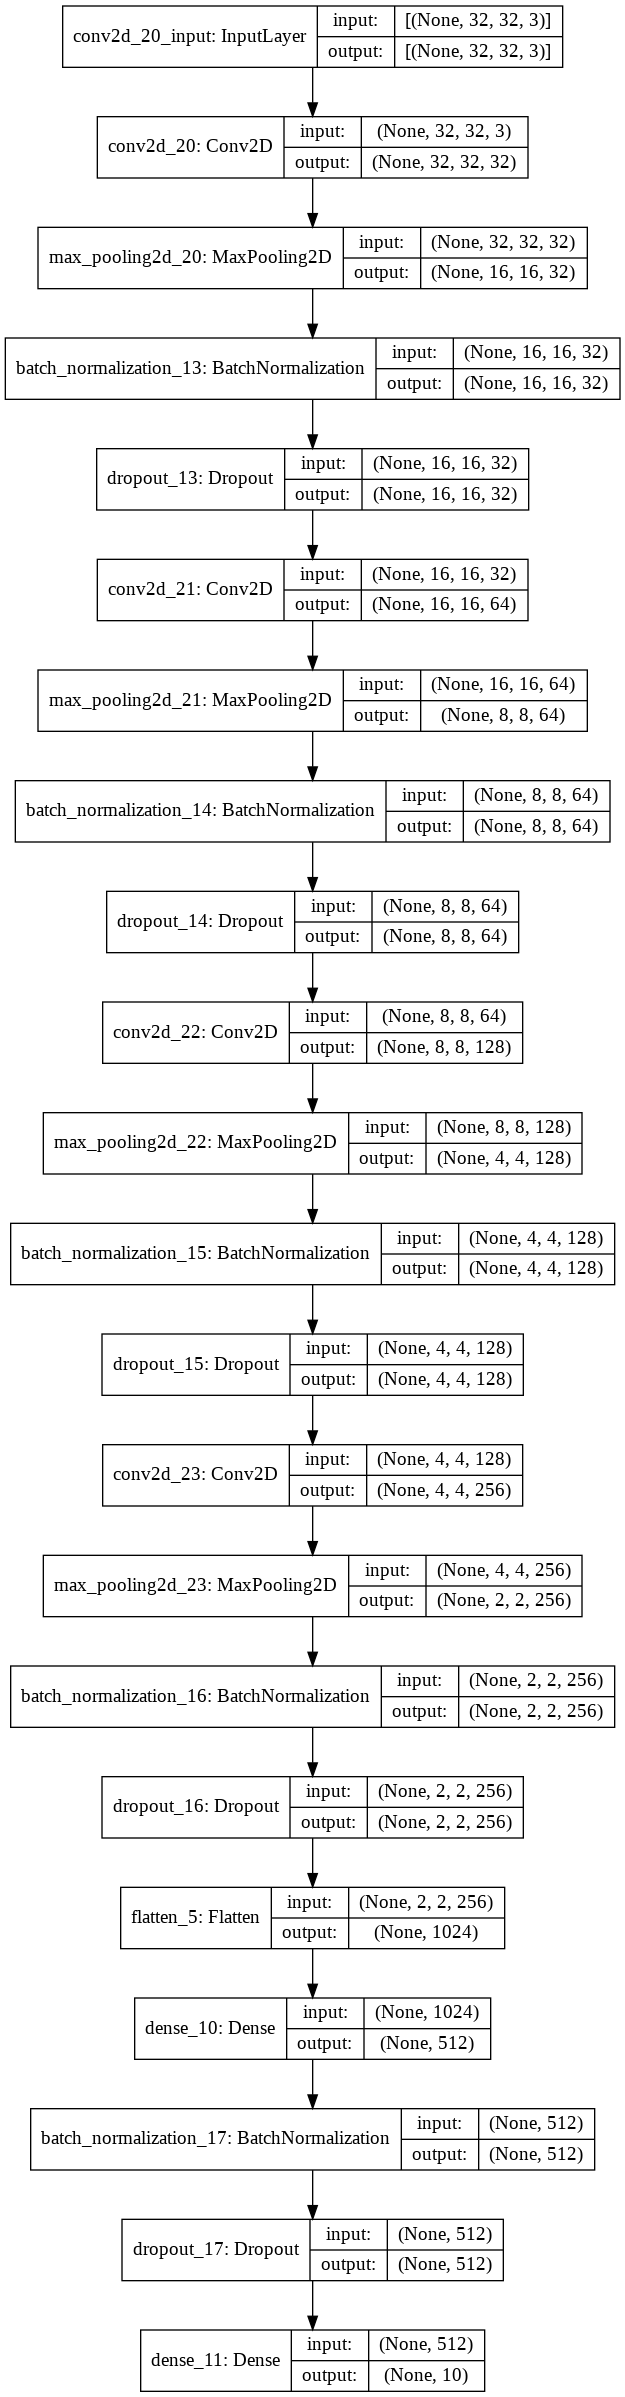

In [30]:
plot_model(model6, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 8, 8, 64)         

In [32]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from keras.applications import VGG19, VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import to_categorical
import random

In [33]:
modelvgg = Sequential()
modelvgg.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
modelvgg.add(MaxPooling2D(pool_size=(2,2)))

modelvgg.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(MaxPooling2D(pool_size=(2,2)))

modelvgg.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(MaxPooling2D(pool_size=(2,2)))

modelvgg.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(MaxPooling2D(pool_size=(2,2)))

modelvgg.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg.add(MaxPooling2D(pool_size=(2,2)))

modelvgg.add(Flatten())
modelvgg.add(Dense(units=4096,activation="relu"))
modelvgg.add(Dense(units=4096,activation="relu"))
modelvgg.add(Dense(units=1000, activation="relu"))
modelvgg.add(Dense(units=10, activation="softmax"))

In [34]:
modelvgg.compile(optimizer ='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [35]:
modelvgg.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 256)        

In [36]:
histvgg = modelvgg.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 43s 80ms/step - loss: 2.3033 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
500/500 [==============================] - 40s 80ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
500/500 [==============================] - 40s 80ms/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
500/500 [==============================] - 40s 80ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
500/500 [==============================] - 40s 80ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
500/500 [==============================] - 40s 80ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
500/500 [==============================] - 40s 80ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy:

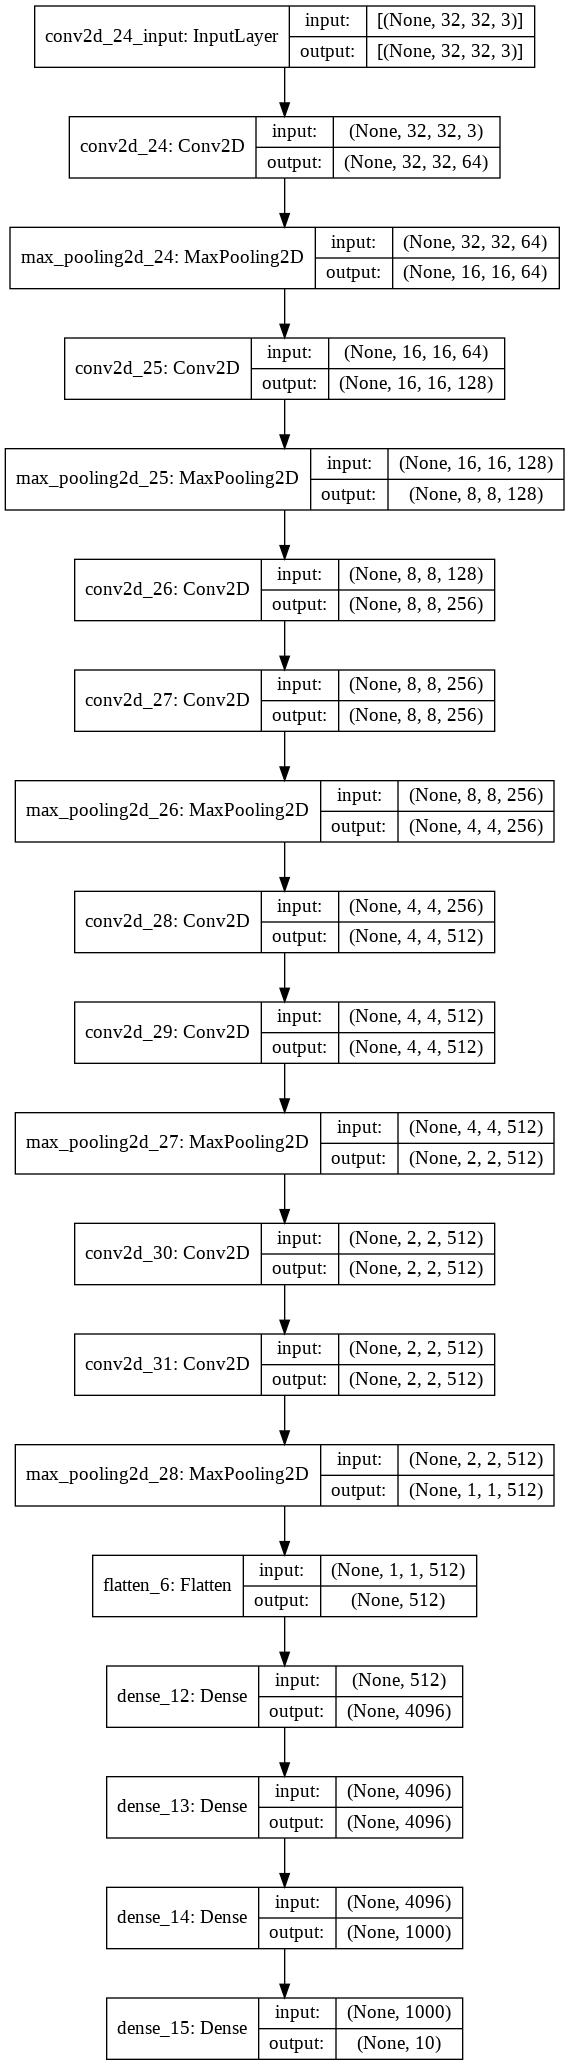

In [37]:
plot_model(modelvgg, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [38]:
scor = modelvgg.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = modelvgg.evaluate((x_train),(y_train),verbose=2)
print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

313/313 - 5s - loss: 2.3026 - accuracy: 0.1000
test los 2.3026
test acc 0.1000
1563/1563 - 20s - loss: 2.3026 - accuracy: 0.1000
train los 2.3026
train acc 0.1000


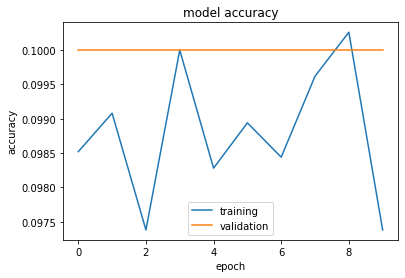

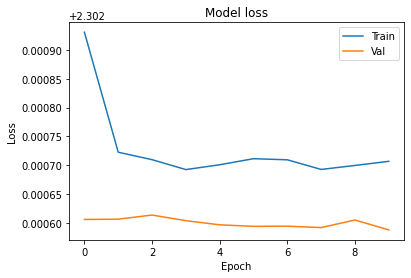

In [39]:
plt.plot(histvgg.history['accuracy'])
plt.plot(histvgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(histvgg.history['loss'])
plt.plot(histvgg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [40]:
opt=tf.keras.optimizers.SGD(learning_rate=0.001)

In [41]:
modelvgg1 = Sequential()
modelvgg1.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
modelvgg1.add(MaxPooling2D(pool_size=(2,2)))

modelvgg1.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(MaxPooling2D(pool_size=(2,2)))

modelvgg1.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(MaxPooling2D(pool_size=(2,2)))

modelvgg1.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(MaxPooling2D(pool_size=(2,2)))

modelvgg1.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg1.add(MaxPooling2D(pool_size=(2,2)))

modelvgg1.add(Flatten())
modelvgg1.add(Dense(units=4096,activation="relu"))
modelvgg1.add(Dense(units=4096,activation="relu"))
modelvgg1.add(Dense(units=1000, activation="relu"))
modelvgg1.add(Dense(units=10, activation="softmax"))

In [42]:
modelvgg1.compile(optimizer =opt,loss="categorical_crossentropy",metrics=['accuracy'])

In [43]:
histvgg1 = modelvgg1.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 39s 77ms/step - loss: 2.3025 - accuracy: 0.1055 - val_loss: 2.3024 - val_accuracy: 0.1026
Epoch 2/10
500/500 [==============================] - 38s 77ms/step - loss: 2.3024 - accuracy: 0.1148 - val_loss: 2.3023 - val_accuracy: 0.1489
Epoch 3/10
500/500 [==============================] - 38s 76ms/step - loss: 2.3023 - accuracy: 0.1437 - val_loss: 2.3022 - val_accuracy: 0.1812
Epoch 4/10
500/500 [==============================] - 38s 77ms/step - loss: 2.3022 - accuracy: 0.1719 - val_loss: 2.3021 - val_accuracy: 0.1928
Epoch 5/10
500/500 [==============================] - 38s 76ms/step - loss: 2.3021 - accuracy: 0.1602 - val_loss: 2.3020 - val_accuracy: 0.1937
Epoch 6/10
500/500 [==============================] - 38s 76ms/step - loss: 2.3020 - accuracy: 0.1802 - val_loss: 2.3019 - val_accuracy: 0.1948
Epoch 7/10
500/500 [==============================] - 38s 76ms/step - loss: 2.3019 - accuracy: 0.1845 - val_loss: 2.3018 - val_accuracy:

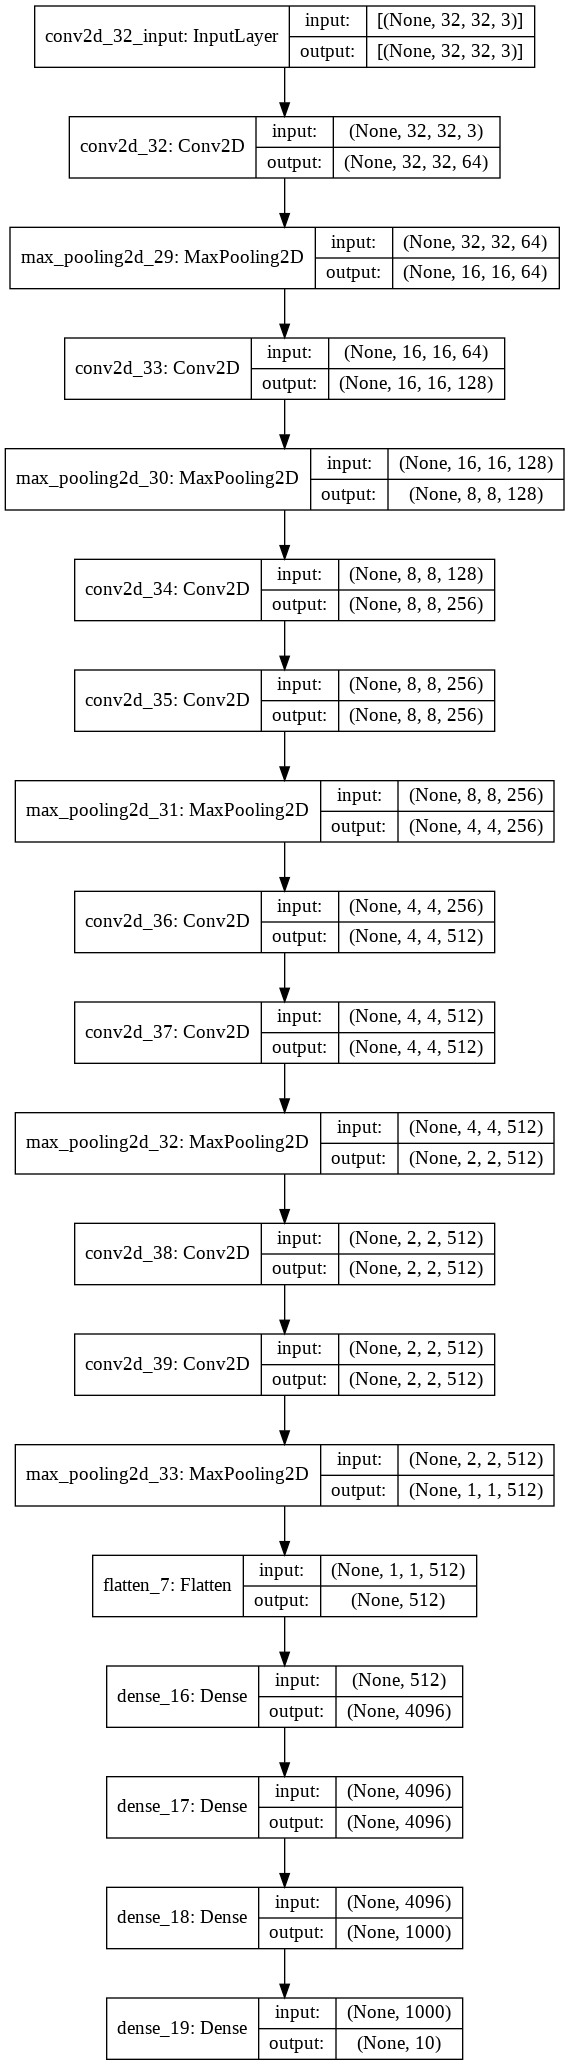

In [44]:
plot_model(modelvgg1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
scor = modelvgg1.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = modelvgg1.evaluate((x_train),(y_train),verbose=2)
print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

313/313 - 4s - loss: 2.3015 - accuracy: 0.2025
test los 2.3015
test acc 0.2025
1563/1563 - 19s - loss: 2.3015 - accuracy: 0.2032
train los 2.3015
train acc 0.2032


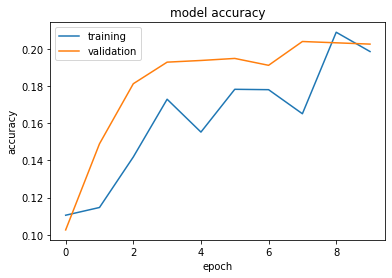

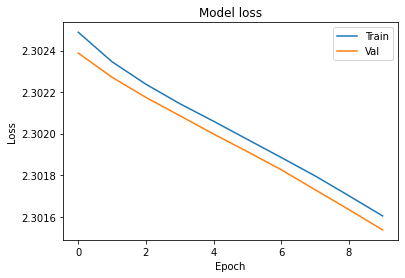

In [46]:
plt.plot(histvgg1.history['accuracy'])
plt.plot(histvgg1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(histvgg1.history['loss'])
plt.plot(histvgg1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [47]:
opt1=tf.keras.optimizers.SGD(learning_rate=0.1)

In [48]:
modelvgg2 = Sequential()
modelvgg2.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
modelvgg2.add(MaxPooling2D(pool_size=(2,2)))

modelvgg2.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(MaxPooling2D(pool_size=(2,2)))

modelvgg2.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(MaxPooling2D(pool_size=(2,2)))

modelvgg2.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(MaxPooling2D(pool_size=(2,2)))

modelvgg2.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg2.add(MaxPooling2D(pool_size=(2,2)))

modelvgg2.add(Flatten())
modelvgg2.add(Dense(units=4096,activation="relu"))
modelvgg2.add(Dense(units=4096,activation="relu"))
modelvgg2.add(Dense(units=1000, activation="relu"))
modelvgg2.add(Dense(units=10, activation="softmax"))

modelvgg2.compile(optimizer =opt1,loss="categorical_crossentropy",metrics=['accuracy'])

histvgg2 = modelvgg2.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))


scor = modelvgg2.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = modelvgg2.evaluate((x_train),(y_train),verbose=2)
print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

Epoch 1/10
500/500 [==============================] - 39s 76ms/step - loss: 2.2991 - accuracy: 0.1076 - val_loss: 2.2992 - val_accuracy: 0.1211
Epoch 2/10
500/500 [==============================] - 38s 76ms/step - loss: 2.2170 - accuracy: 0.1696 - val_loss: 1.9608 - val_accuracy: 0.2786
Epoch 3/10
500/500 [==============================] - 38s 76ms/step - loss: 1.9436 - accuracy: 0.2866 - val_loss: 1.6813 - val_accuracy: 0.3734
Epoch 4/10
500/500 [==============================] - 38s 77ms/step - loss: 1.6854 - accuracy: 0.3777 - val_loss: 1.5147 - val_accuracy: 0.4454
Epoch 5/10
500/500 [==============================] - 38s 76ms/step - loss: 1.4801 - accuracy: 0.4590 - val_loss: 1.3282 - val_accuracy: 0.5167
Epoch 6/10
500/500 [==============================] - 38s 76ms/step - loss: 1.2938 - accuracy: 0.5327 - val_loss: 1.1865 - val_accuracy: 0.5776
Epoch 7/10
500/500 [==============================] - 38s 76ms/step - loss: 1.1287 - accuracy: 0.5972 - val_loss: 1.1333 - val_accuracy:

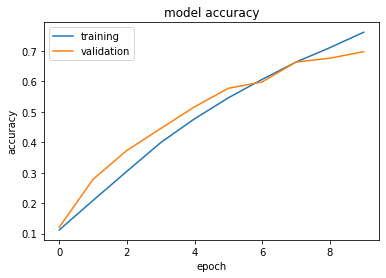

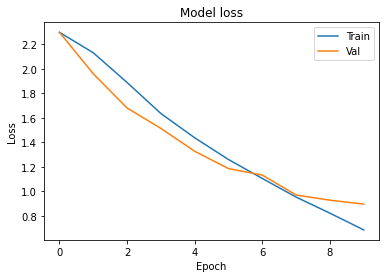

In [49]:
plt.plot(histvgg2.history['accuracy'])
plt.plot(histvgg2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(histvgg2.history['loss'])
plt.plot(histvgg2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

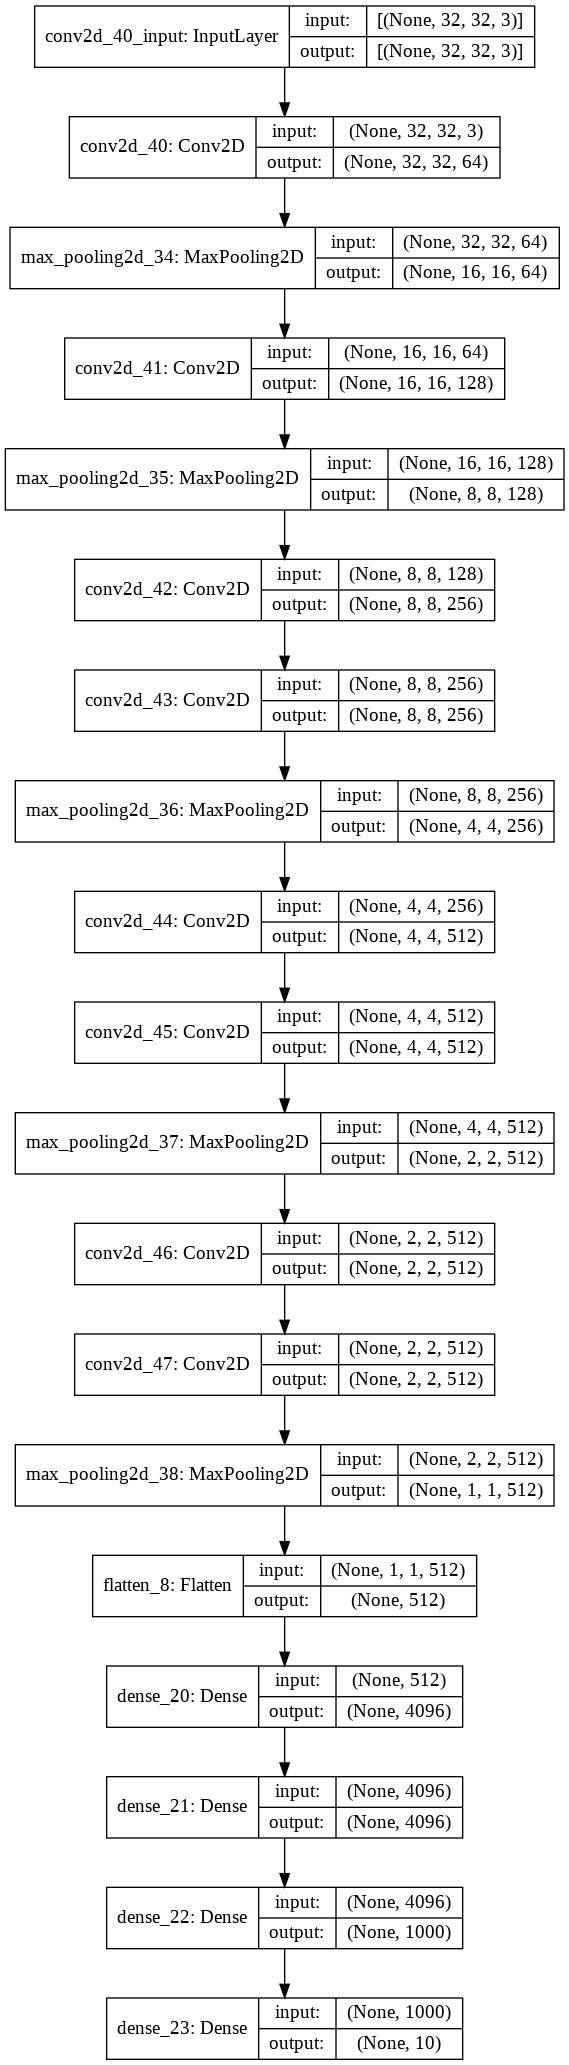

In [50]:
plot_model(modelvgg2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [51]:
modelvgg5 = Sequential()
modelvgg5.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
modelvgg5.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(MaxPooling2D(pool_size=(2,2)))

modelvgg5.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(MaxPooling2D(pool_size=(2,2)))

modelvgg5.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(MaxPooling2D(pool_size=(2,2)))

modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(MaxPooling2D(pool_size=(2,2)))

modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg5.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu')) 
modelvgg5.add(MaxPooling2D(pool_size=(2,2)))

modelvgg5.add(Flatten())
modelvgg5.add(Dense(units=4096,activation="relu"))
modelvgg5.add(Dense(units=4096,activation="relu"))
modelvgg5.add(Dense(units=1000, activation="relu"))
modelvgg5.add(Dense(units=10, activation="softmax"))

In [52]:
modelvgg5.compile(optimizer =opt1,loss="categorical_crossentropy",metrics=['accuracy'])

histvgg5 = modelvgg5.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))


scor = modelvgg5.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = modelvgg5.evaluate((x_train),(y_train),verbose=2)
print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

Epoch 1/10
500/500 [==============================] - 74s 146ms/step - loss: 2.3029 - accuracy: 0.0972 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
500/500 [==============================] - 72s 143ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
500/500 [==============================] - 71s 142ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
500/500 [==============================] - 71s 142ms/step - loss: 2.3029 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
500/500 [==============================] - 71s 142ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
500/500 [==============================] - 71s 142ms/step - loss: 2.3029 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
500/500 [==============================] - 71s 142ms/step - loss: 2.3029 - accuracy: 0.0969 - val_loss: 2.3027 - val_ac

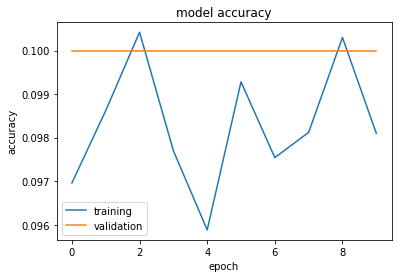

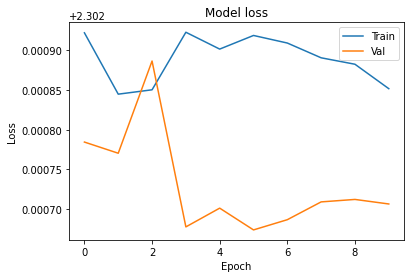

In [53]:
plt.plot(histvgg5.history['accuracy'])
plt.plot(histvgg5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(histvgg5.history['loss'])
plt.plot(histvgg5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

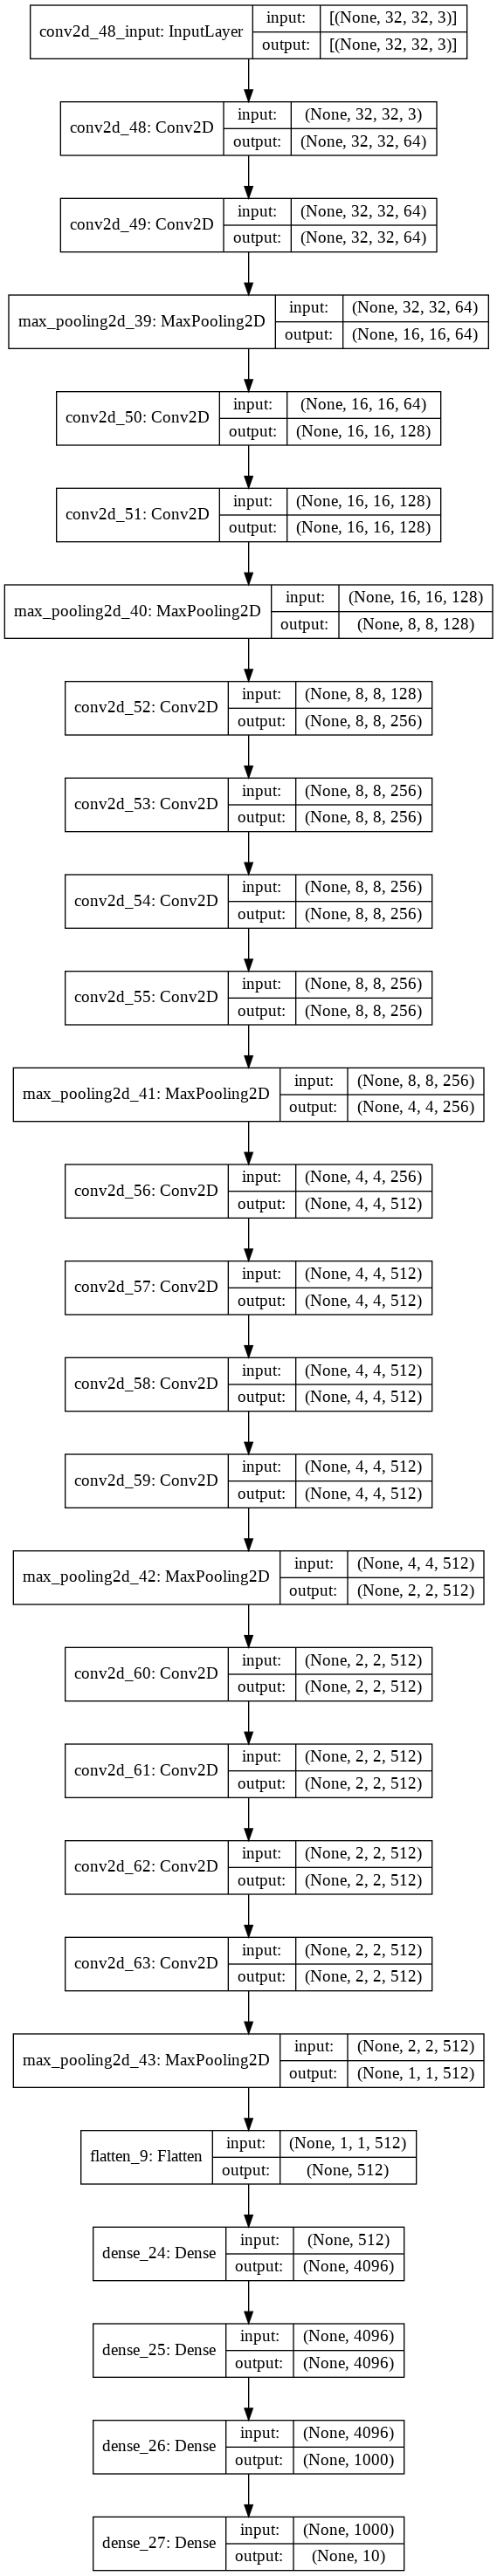

In [54]:
plot_model(modelvgg5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [55]:
modelvgg6 = Sequential()
modelvgg6.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
modelvgg6.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(MaxPooling2D(pool_size=(2,2)))

modelvgg6.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(MaxPooling2D(pool_size=(2,2)))

modelvgg6.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
modelvgg6.add(MaxPooling2D(pool_size=(2,2)))

modelvgg6.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
modelvgg6.add(MaxPooling2D(pool_size=(2,2)))

modelvgg6.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg6.add(Conv1D(filters= 512, kernel_size=3,padding = 'same', activation = 'relu'))
modelvgg6.add(MaxPooling2D(pool_size=(2,2)))

modelvgg6.add(Flatten())
modelvgg6.add(Dense(units=4096,activation="relu"))
modelvgg6.add(Dense(units=4096,activation="relu"))
modelvgg6.add(Dense(units=1000, activation="relu"))
modelvgg6.add(Dense(units=10, activation="softmax"))

In [56]:
modelvgg6.compile(optimizer =opt1,loss="categorical_crossentropy",metrics=['accuracy'])

histvgg6 = modelvgg6.fit(x_train, y_train, epochs=10, batch_size= 100,validation_data=(x_test, y_test))


scor = modelvgg6.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = modelvgg6.evaluate((x_train),(y_train),verbose=2)
print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

Epoch 1/10
500/500 [==============================] - 61s 119ms/step - loss: 2.3007 - accuracy: 0.1055 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 2/10
500/500 [==============================] - 59s 117ms/step - loss: 2.3031 - accuracy: 0.1017 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
500/500 [==============================] - 59s 117ms/step - loss: 2.3030 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
500/500 [==============================] - 59s 117ms/step - loss: 2.2504 - accuracy: 0.1396 - val_loss: 2.3030 - val_accuracy: 0.1007
Epoch 5/10
500/500 [==============================] - 59s 117ms/step - loss: 2.2926 - accuracy: 0.1110 - val_loss: 2.1555 - val_accuracy: 0.1675
Epoch 6/10
500/500 [==============================] - 59s 118ms/step - loss: 2.0625 - accuracy: 0.2302 - val_loss: 1.8490 - val_accuracy: 0.3196
Epoch 7/10
500/500 [==============================] - 59s 118ms/step - loss: 1.8859 - accuracy: 0.2997 - val_loss: 1.6962 - val_ac

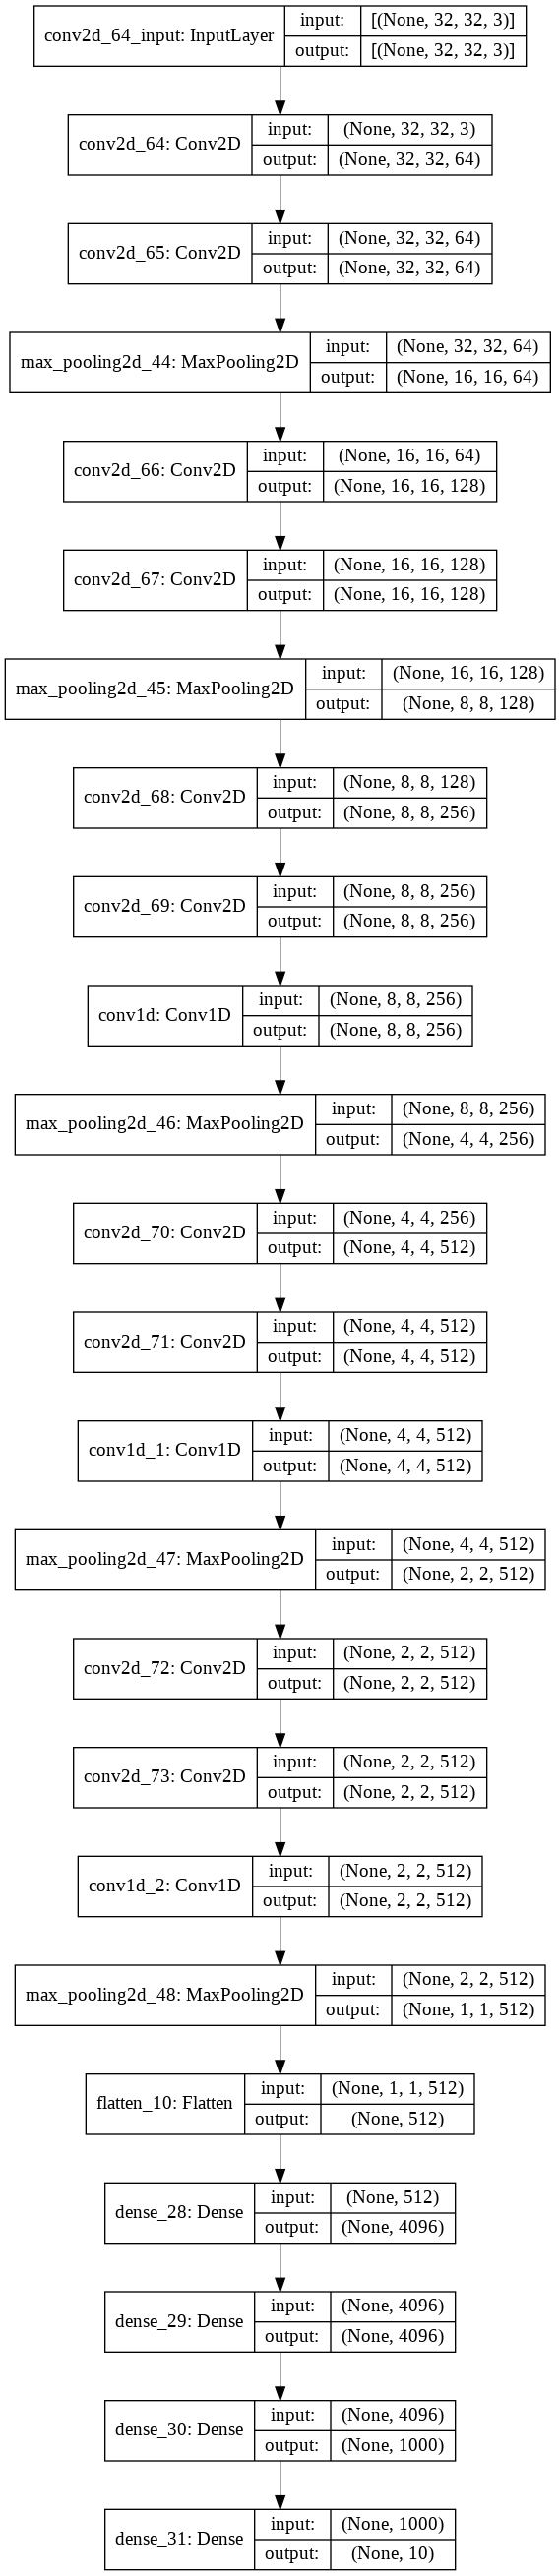

In [57]:
plot_model(modelvgg6, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
modelvgg4= Sequential()
modelvgg4.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
modelvgg4.add(Conv2D(filters= 64, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(MaxPooling2D(pool_size=(2,2)))


modelvgg4.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 128, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(MaxPooling2D(pool_size=(2,2)))
modelvgg4.add(BatchNormalization())

modelvgg4.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 256, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(MaxPooling2D(pool_size=(2,2)))
modelvgg4.add(BatchNormalization())

modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(MaxPooling2D(pool_size=(2,2)))
modelvgg4.add(BatchNormalization())

modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu'))
modelvgg4.add(Conv2D(filters= 512, kernel_size=(3,3),padding = 'same', activation = 'relu')) 
modelvgg4.add(MaxPooling2D(pool_size=(2,2)))
modelvgg4.add(BatchNormalization())

modelvgg4.add(Flatten())
modelvgg4.add(Dense(units=4096,activation="relu"))
modelvgg4.add(Dense(units=4096,activation="relu"))
modelvgg4.add(Dense(units=1000, activation="relu"))
modelvgg4.add(Dense(units=10, activation="softmax"))

In [59]:
modelvgg4.compile(optimizer ="adam",loss="categorical_crossentropy",metrics=['accuracy'])

histvgg4 = modelvgg4.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


scor = modelvgg4.evaluate((x_test),(y_test),verbose=2)
print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

scor = modelvgg4.evaluate((x_train),(y_train),verbose=2)
print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

Epoch 1/20
1563/1563 [==============================] - 142s 90ms/step - loss: 2.0989 - accuracy: 0.1770 - val_loss: 4.3205 - val_accuracy: 0.1340
Epoch 2/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.8320 - accuracy: 0.2511 - val_loss: 1.6542 - val_accuracy: 0.3509
Epoch 3/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.7108 - accuracy: 0.3184 - val_loss: 2.3787 - val_accuracy: 0.2578
Epoch 4/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5318 - accuracy: 0.3831 - val_loss: 2.5639 - val_accuracy: 0.2262
Epoch 5/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4061 - accuracy: 0.4504 - val_loss: 1.3957 - val_accuracy: 0.5593
Epoch 6/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1499 - accuracy: 0.5822 - val_loss: 2.8995 - val_accuracy: 0.5003
Epoch 7/20
1563/1563 [==============================] - 140s 89ms/step - loss: 1.0185 - accuracy: 0.6376 - val_loss: 2

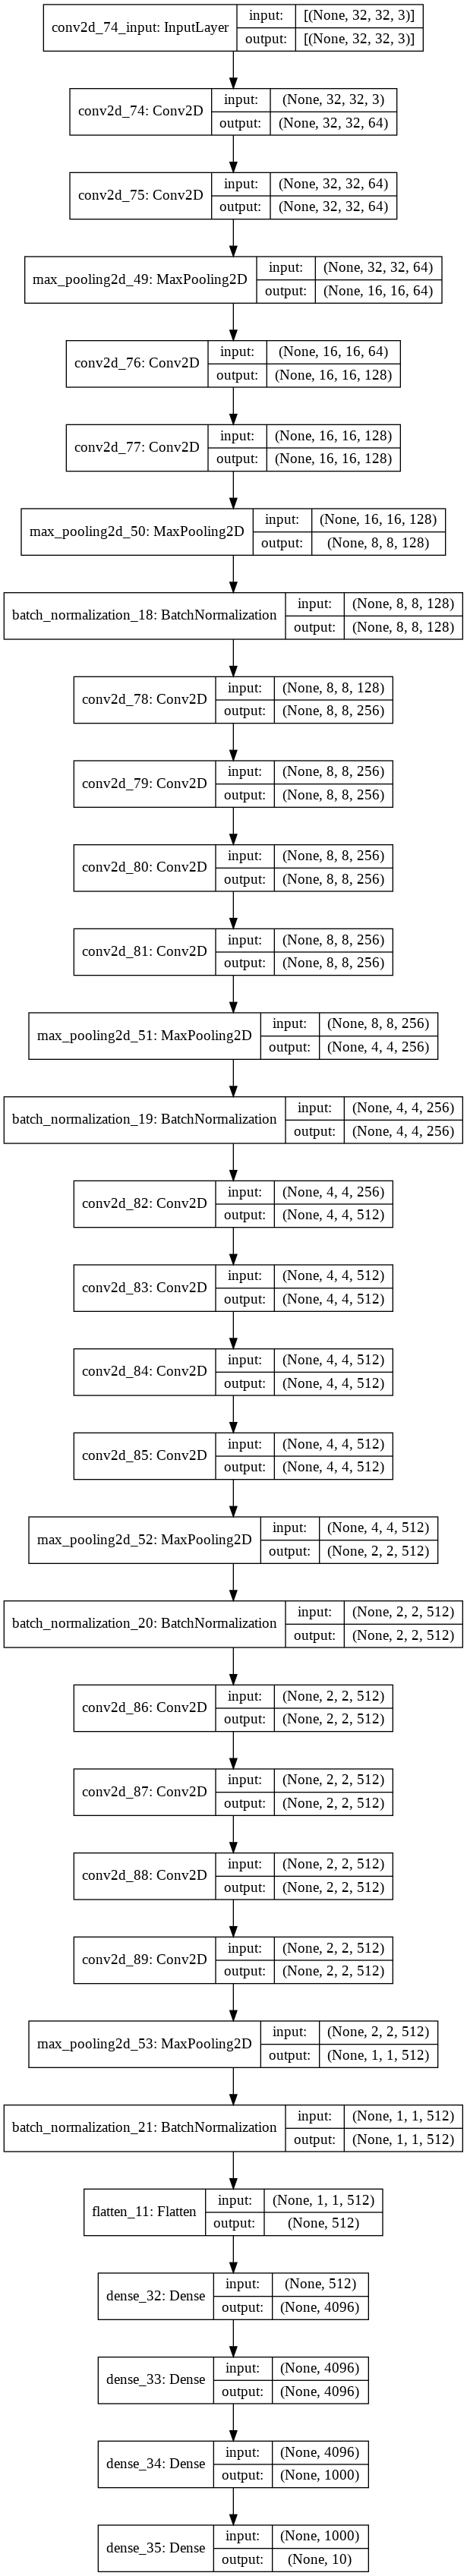

In [60]:
plot_model(modelvgg4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)